In [60]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [61]:
#Load the dataset
df = pd.read_csv('d:\\Git Project\\Diabeties\\Data\\diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
#Let's observe the shape of the dataframe.
df.shape

(768, 9)

In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### As observed above we have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label. 



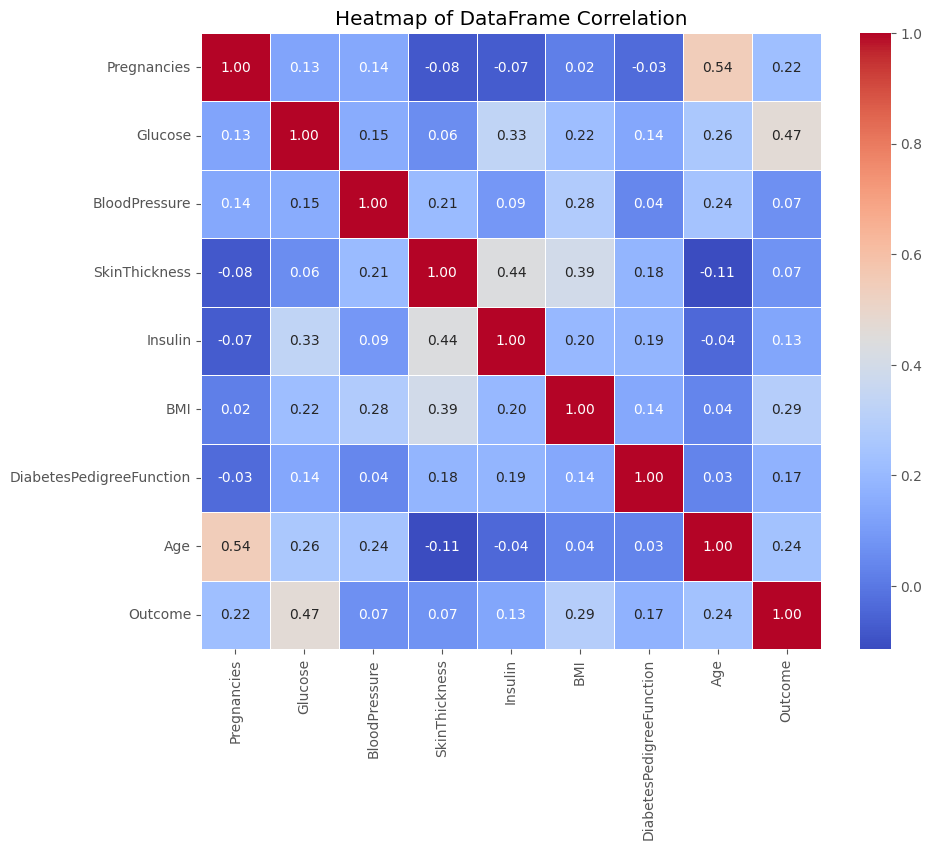

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# فرض می‌کنیم که df یک DataFrame است
# اگر داده‌ها شامل مقادیر NaN هستند، باید آنها را حذف یا پر کنید
df_cleaned = df.dropna()  # یا از df.fillna() برای پر کردن NaN ها استفاده کنید

# رسم Heatmap
plt.figure(figsize=(10, 8))  # اندازه figure را تنظیم می‌کنیم
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# نمایش
plt.title("Heatmap of DataFrame Correlation")
plt.show()


In [7]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

> Let's split the data randomly into training and test set. 

In [8]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

> Let's create a classifier using k-Nearest Neighbors algorithm.

First let us first observe the accuracies for different values of k.

In [10]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

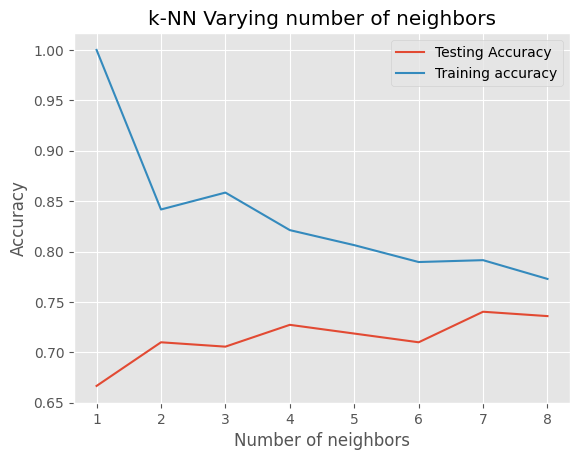

In [11]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Maximum testing accuracy is for k=7. 
Create a KNeighborsClassifier with number of neighbors as 7.

In [12]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [13]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [14]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7402597402597403

# **Confusion Matrix**

In [15]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [16]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [17]:
confusion_matrix(y_test,y_pred)

array([[129,  21],
       [ 39,  42]])

### Considering confusion matrix above:

    - True negative = 165 

    - False positive = 36 

    - True postive = 60 

    - Fasle negative = 47 

# **Classification Report**

In [18]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



## **Cross Validation**
**Hyperparameter tuning**

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning. 

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time


In [19]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [20]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [21]:
knn_cv.best_params_

{'n_neighbors': np.int64(14)}

In [22]:
knn_cv.best_score_

np.float64(0.7578558696205755)

In [23]:
# Calculate mean only from non-zero values
insulin_mean = df[df['Insulin'] != 0]['Insulin'].mean()
skin_mean = df[df['SkinThickness'] != 0]['SkinThickness'].mean()

# Replace zero values with the calculated mean
df['Insulin'] = df['Insulin'].replace(0, insulin_mean)
df['SkinThickness'] = df['SkinThickness'].replace(0, skin_mean)

# Display the first few rows to verify changes
print(df[['Insulin', 'SkinThickness']].head())

      Insulin  SkinThickness
0  155.548223       35.00000
1  155.548223       29.00000
2  155.548223       29.15342
3   94.000000       23.00000
4  168.000000       35.00000


In [24]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1
5,5,116,74,29.15342,155.548223,25.6,0.201,30,0
6,3,78,50,32.00000,88.000000,31.0,0.248,26,1
7,10,115,0,29.15342,155.548223,35.3,0.134,29,0
8,2,197,70,45.00000,543.000000,30.5,0.158,53,1
9,8,125,96,29.15342,155.548223,0.0,0.232,54,1


In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Split features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred2 = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print(f"KNN Accuracy after handling missing values: {accuracy:.4f}")

KNN Accuracy after handling missing values: 0.7403


In [27]:
confusion_matrix(y_test,y_pred2)

array([[132,  18],
       [ 42,  39]])

In [28]:
#import classification_report

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       150
           1       0.68      0.48      0.57        81

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# Different scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Test each scaler
for scaler_name, scaler in scalers.items():
    # Apply scaling
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=14)
    knn.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{scaler_name} Accuracy: {accuracy:.4f}")

StandardScaler Accuracy: 0.7403
MinMaxScaler Accuracy: 0.7273
RobustScaler Accuracy: 0.7489


In [30]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1
5,5,116,74,29.15342,155.548223,25.6,0.201,30,0
6,3,78,50,32.00000,88.000000,31.0,0.248,26,1
7,10,115,0,29.15342,155.548223,35.3,0.134,29,0
8,2,197,70,45.00000,543.000000,30.5,0.158,53,1
9,8,125,96,29.15342,155.548223,0.0,0.232,54,1


In [31]:
from sklearn.decomposition import PCA

# Apply RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN with optimal k
knn_pca = KNeighborsClassifier(n_neighbors=14)
knn_pca.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"KNN Accuracy after RobustScaler + PCA: {accuracy_pca:.4f}")

# Show number of components selected
print(f"Number of components selected by PCA: {pca.n_components_}")

KNN Accuracy after RobustScaler + PCA: 0.7489
Number of components selected by PCA: 7


In [34]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Find the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}")


Logistic Regression Accuracy: 0.7316
Random Forest Accuracy: 0.7359
SVM Accuracy: 0.7403
XGBoost Accuracy: 0.7403

Best Model: SVM with Accuracy: 0.7403


d:\Git Project\Diabeties\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:15:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [35]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1
5,5,116,74,29.15342,155.548223,25.6,0.201,30,0
6,3,78,50,32.00000,88.000000,31.0,0.248,26,1
7,10,115,0,29.15342,155.548223,35.3,0.134,29,0
8,2,197,70,45.00000,543.000000,30.5,0.158,53,1
9,8,125,96,29.15342,155.548223,0.0,0.232,54,1


In [36]:


# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Find the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}")

Logistic Regression Accuracy: 0.7316
Random Forest Accuracy: 0.7316
SVM Accuracy: 0.7619
XGBoost Accuracy: 0.7403

Best Model: SVM with Accuracy: 0.7619


d:\Git Project\Diabeties\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:18:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [37]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['rbf']  # We use RBF kernel
}

# Run GridSearch
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print(f"Best SVM Parameters: {grid_search.best_params_}")
print(f"Best SVM Accuracy: {grid_search.best_score_:.4f}")


Best SVM Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best SVM Accuracy: 0.7709


In [38]:
# Train final SVM model with best parameters
final_svm = SVC(C=1, gamma=0.01, kernel='rbf')
final_svm.fit(X_train, y_train)

# Predict on test data
y_pred_final = final_svm.predict(X_test)

# Calculate accuracy on test data
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"Final SVM Test Accuracy: {final_accuracy:.4f}")


Final SVM Test Accuracy: 0.7489


In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
keras.utils.set_random_seed(42)
# ساخت مدل ANN
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # اضافه کردن Dropout
    Dense(16, activation='relu'),
    # Dropout(0.3),  # اضافه کردن Dropout
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # خروجی باینری
])

# کامپایل کردن مدل
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# تعریف EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

# ReduceLROnPlateau برای کاهش نرخ یادگیری به صورت پویا
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# آموزش مدل
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    verbose=1, callbacks=[early_stopping])

# ارزیابی روی داده تست
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"ANN Test Accuracy: {test_acc:.4f}")


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6956 - loss: 0.6329 - val_accuracy: 0.6667 - val_loss: 0.6076
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6670 - loss: 0.5947 - val_accuracy: 0.6883 - val_loss: 0.5673
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5686 - val_accuracy: 0.6883 - val_loss: 0.5435
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7125 - loss: 0.5583 - val_accuracy: 0.7100 - val_loss: 0.5259
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7404 - loss: 0.5403 - val_accuracy: 0.7229 - val_loss: 0.5142
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7547 - loss: 0.5333 - val_accuracy: 0.7273 - val_loss: 0.5066
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7536 - loss: 0.5383 - val_accuracy: 0.7273 - val_loss: 0.5033
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7568 - loss: 0.5248 - val_accuracy: 0.7316 - 